In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data
path = 'C:/Users/Mehmet/Desktop/data/new_stock_data/GSPC_long.csv'
df = pd.DataFrame(pd.read_csv(path,index_col='Date',parse_dates=True))
last_date = '12/31/2015'

In [3]:
# Generating return,suared return columns
df['r'] = df['Adj Close'].pct_change()
df = df[:'2015'].dropna()
df['sqr']= df['r']**2

In [4]:
# Defening parameters
l = 0.94
span = 60
a = -(-len(df['r'])//span)
print(a)
b= pd.Series(np.arange(0,60))
b= np.argsort(-b)
c = list(b)*a

219


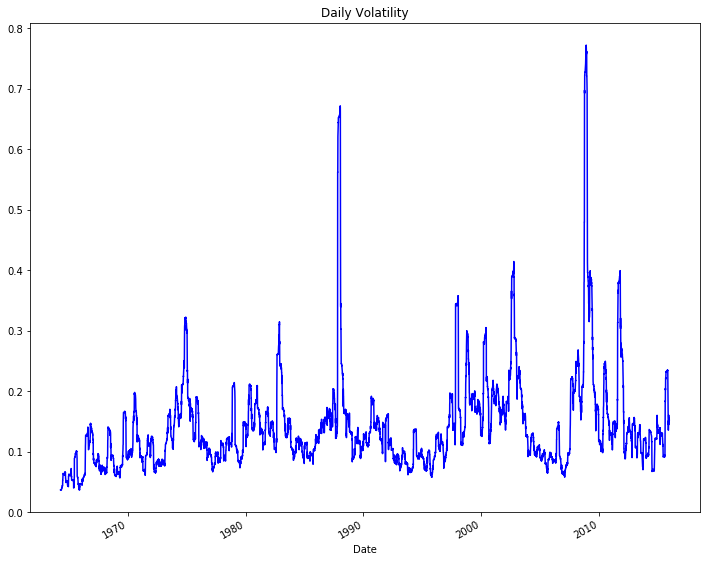

In [5]:
df1 = pd.DataFrame(c)
df1 = df1.iloc[:(len(df['r'])+1)]
df1.columns = ['lambda']
df.reset_index(inplace=True)

df_n = pd.concat([df,df1],axis=1)
df_n=df_n.set_index('Date').dropna()
w = []
for j in df_n['lambda']:
 a= (1-l)*(l**j)
 w.append(a)
w_df=pd.DataFrame(w)
w_df.rename(columns={0:'w'}, inplace=True)

df_n.reset_index(inplace=True)
df_n = pd.concat([df_n,w_df],axis=1)
df_n=df_n.set_index('Date').dropna()

df_ewma = df_n[['r']].iloc[60:].copy()
df_ewma.reset_index(inplace=True)
ewma = []
for i in range(span,len(df['sqr'])):
    a = df_n['sqr'].iloc[i-span:i].dot(df_n['w'].iloc[i-span:i])
    ewma.append(a*252)
ewma_df = pd.DataFrame(ewma)
ewma_df.rename(columns={0:'ewma'}, inplace=True)
df_ewma= pd.concat([df_ewma,ewma_df],axis=1)
df_ewma=df_ewma.set_index('Date').dropna()
df_ewma['daily_volatility'] = (np.sqrt(df_ewma['ewma']))

pd.plotting.register_matplotlib_converters()
df_ewma['daily_volatility'].plot(kind='line',color='blue',title='Daily Volatility',figsize=(12,10))
plt.show()

df_ewma['daily_volatility'] =df_ewma['daily_volatility'].astype(float).map("{:.2%}".format)
